In [1]:
import pandas as pd
path = "/home/font/Data/MM/HMP/"

HMPaddress = 'HMPaddress.csv'
df_HMPaddress = pd.read_csv((path+HMPaddress))

HMP = 'HMP.csv'
df_HMP = pd.read_csv((path+HMP))
df_HMP['stats'] = df_HMPaddress['stats']
df_HMP = df_HMP.drop(['ID'],axis=1)
df_HMP.describe()

,As,Cd,Cr,Cu,Hg,Ni,Pb,Zn,stats
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,5.676489,302.396238,53.509655,55.016740,299.711285,17.261850,61.740940,201.202633,3.263323
std,3.024292,224.987602,70.001789,162.915095,1629.539780,9.941423,50.057759,339.232545,1.212981
min,1.610000,40.000000,15.320000,2.290000,8.570000,4.270000,19.680000,32.860000,1.000000
25%,3.770000,148.500000,33.810000,18.980000,30.000000,12.490000,33.715000,75.405000,2.500000
50%,5.310000,238.700000,42.020000,27.980000,50.000000,15.980000,45.830000,106.430000,4.000000
75%,6.770000,369.000000,54.530000,53.300000,112.500000,19.780000,71.070000,196.530000,4.000000
max,30.130000,1619.800000,920.840000,2528.480000,16000.000000,142.500000,472.480000,3760.820000,5.000000


In [2]:
# [mean-m*sigma,mean+m*sigma] 修改异常点,此处选择 m = 3
m = 3
df_mms_1 = df_HMP.mean() - m * df_HMP.std()
df_mms_2 = df_HMP.mean() + m * df_HMP.std()
df_mms_2

As         14.749366
Cd        977.359045
Cr        263.515023
Cu        543.762026
Hg       5188.330625
Ni         47.086119
Pb        211.914216
Zn       1218.900268
stats       6.902267
dtype: float64

In [3]:
list_columns = list(df_HMP.columns)
list_mms1 = list(df_mms_1)
list_mms2 = list(df_mms_2)


df_HMP_test = df_HMP.copy(deep=True)
df_HMP_test_new = df_HMP.copy(deep=True)
for i in range(len(list_columns)):
    df_HMP_test_new[list_columns[i]].loc[df_HMP_test[list_columns[i]] > list_mms2[i]] = list_mms2[i]
    df_HMP_test_new[list_columns[i]].loc[df_HMP_test[list_columns[i]] < list_mms1[i]] = list_mms1[i]

df_HMP_test_new.to_csv(path+'df_HMP_test_new.csv',index=None)
df_HMP_test_new.describe()

/home/font/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,As,Cd,Cr,Cu,Hg,Ni,Pb,Zn,stats
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,5.560711,298.182487,49.738997,46.221110,182.320447,16.878283,59.592386,182.363611,3.263323
std,2.411847,208.006275,34.698194,57.722057,612.791922,6.694916,37.307661,211.437728,1.212981
min,1.610000,40.000000,15.320000,2.290000,8.570000,4.270000,19.680000,32.860000,1.000000
25%,3.770000,148.500000,33.810000,18.980000,30.000000,12.490000,33.715000,75.405000,2.500000
50%,5.310000,238.700000,42.020000,27.980000,50.000000,15.980000,45.830000,106.430000,4.000000
75%,6.770000,369.000000,54.530000,53.300000,112.500000,19.780000,71.070000,196.530000,4.000000
max,14.749366,977.359045,263.515023,543.762026,5188.330625,47.086119,211.914216,1218.900268,5.000000


In [4]:
import math
def Nemerow(DataFrame,axis=0):
    resultNumber = DataFrame.mean(axis=axis) ** 2 + DataFrame.max(axis=axis) ** 2
    resultNumber = (resultNumber/2)
    return resultNumber

# 计算单因子指标,S为国家二级标准
df_HMP_p = df_HMP_test_new/[25,300,300,100,500,50,300,250,1]

print("单因子系数使用国家二级标准(中性土壤)")
list_Nemerow = []
for j in [1,2,3,4,5]:
    list_area =[]
#     df_HMP_area = df_HMP_p.loc[df_HMP_p['stats']  == j]
    df_HMP_area = df_HMP_p.loc[df_HMP_p['stats']  == j].drop(['stats'],axis=1)
#     print("\n当前区域为:",j)
#     print('\n',df_HMP_area.head(),'\n')
    for i in range(len(list(Nemerow(df_HMP_area)))):
#         print(list(df_HMP_area.columns)[i] ,'--内梅罗系数-->',math.sqrt(list(Nemerow(df_HMP_area))[i]))
        list_area.append(math.sqrt(list(Nemerow(df_HMP_area))[i]))        
    list_Nemerow.append(list_area)
pd_Nemerow = pd.DataFrame(list_Nemerow)
pd_Nemerow.columns = df_HMP_area.columns
pd_Nemerow.index = [1,2,3,4,5]
pd_Nemerow

单因子系数使用国家二级标准(中性土壤)


,As,Cd,Cr,Cu,Hg,Ni,Pb,Zn
1,0.369238,2.401881,0.636022,1.793976,0.788868,0.531466,0.520961,3.493192
2,0.461202,2.478054,0.633454,3.878915,7.360447,0.652900,0.535692,3.525776
3,0.331222,1.025614,0.418759,0.503447,0.298126,0.699067,0.281818,0.682232
4,0.445417,2.448977,0.633541,3.865507,7.344975,0.707613,0.453208,3.501813
5,0.374867,2.395800,0.249153,1.035599,1.901011,0.464884,0.519292,3.473361


<Figure size 1008x864 with 0 Axes>

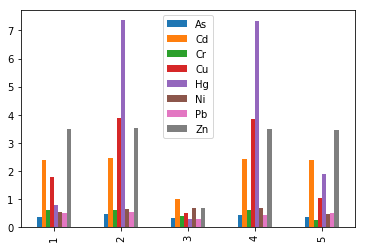

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,12))
pd_Nemerow.plot(kind='bar')
plt.show()

In [6]:
list_area_all =[]
for i in range(len(list(Nemerow(pd_Nemerow,axis=1)))):
    list_area_all.append(math.sqrt(list(Nemerow(pd_Nemerow,axis=1))[i]))        

pd_Nemerow_all = pd.DataFrame(list_area_all)
pd_Nemerow_all.columns = ['城区综合内梅罗系数']
pd_Nemerow_all.index = [1,2,3,4,5]
pd_Nemerow_all

,城区综合内梅罗系数
1,2.639768
2,5.483325
3,0.816340
4,5.469457
5,2.622859


In [7]:
df_HMP_test_new_2 = df_HMP_test_new.copy(deep=True)
df_HMP_test_new_2['number'] = (df_HMP_test_new - df_HMP).sum(axis=1)

df_HMP_test_new_2 = df_HMP_test_new_2.loc[df_HMP_test_new_2['number']  == 0].drop(['number'],axis=1)

In [8]:
def Get_df_Nemerow(DataFrame):
    # 计算单因子指标,S为国家二级标准
    df_HMP_p = DataFrame/[25,300,300,100,500,50,300,250,1]

    print("单因子系数使用国家二级标准(中性土壤)")
    list_Nemerow = []
    for j in [1,2,3,4,5]:
        list_area =[]
    #     df_HMP_area = df_HMP_p.loc[df_HMP_p['stats']  == j]
        df_HMP_area = df_HMP_p.loc[df_HMP_p['stats']  == j].drop(['stats'],axis=1)
    #     print("\n当前区域为:",j)
    #     print('\n',df_HMP_area.head(),'\n')
        for i in range(len(list(Nemerow(df_HMP_area)))):
    #         print(list(df_HMP_area.columns)[i] ,'--内梅罗系数-->',math.sqrt(list(Nemerow(df_HMP_area))[i]))
            list_area.append(math.sqrt(list(Nemerow(df_HMP_area))[i]))        
        list_Nemerow.append(list_area)
    pd_Nemerow = pd.DataFrame(list_Nemerow)
    pd_Nemerow.columns = df_HMP_area.columns
    pd_Nemerow.index = [1,2,3,4,5]
    return pd_Nemerow

pd_Nemerow_df_HMP_test_new_2 = Get_df_Nemerow(df_HMP_test_new_2)
pd_Nemerow_df_HMP_test_new_2

单因子系数使用国家二级标准(中性土壤)


,As,Cd,Cr,Cu,Hg,Ni,Pb,Zn
1,0.355813,1.886051,0.422994,1.788243,0.787482,0.511336,0.336743,1.281044
2,0.350183,2.419008,0.231397,0.996847,2.562752,0.570146,0.454909,1.814202
3,0.331565,1.024940,0.235295,0.503170,0.298122,0.674905,0.281607,0.527572
4,0.298435,2.230349,0.619546,1.999138,2.429144,0.450288,0.428356,2.473433
5,0.373906,2.223047,0.248190,1.033873,1.900962,0.464101,0.444299,1.275968


In [9]:
def Get_df_Nemerow_all(DataFrame):
    list_area_all =[]
    for i in range(len(list(Nemerow(DataFrame,axis=1)))):
        list_area_all.append(math.sqrt(list(Nemerow(DataFrame,axis=1))[i]))        

    pd_Nemerow_all = pd.DataFrame(list_area_all)
    pd_Nemerow_all.columns = ['城区综合内梅罗系数']
    pd_Nemerow_all.index = [1,2,3,4,5]
    return pd_Nemerow_all

pd_Nemerow_all_df_HMP_test_new_2 = Get_df_Nemerow_all(pd_Nemerow_df_HMP_test_new_2)
pd_Nemerow_all_df_HMP_test_new_2

,城区综合内梅罗系数
1,1.484221
2,1.993509
3,0.801681
4,1.998007
5,1.722359
